### Задание 1

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
data = boston.data

In [7]:
feature_names = boston.feature_names

In [8]:
X = pd.DataFrame(data, columns=feature_names)
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [9]:
target = boston.target
y = pd.DataFrame(target, columns=['Price'])
y.head(10)

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [17]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [19]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

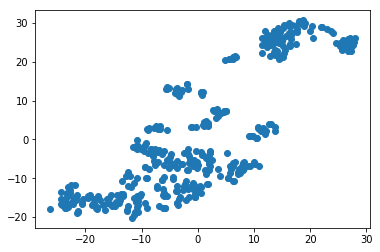

In [23]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

In [25]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [46]:
labels_train = kmeans.fit_predict(X_train_scaled)

Text(10, 30, 'кластер 2')

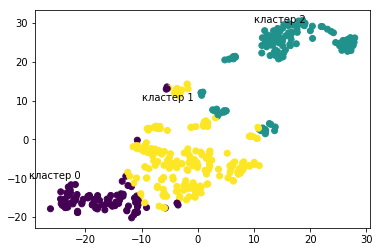

In [50]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-30, -10, 'кластер 0')
plt.text(-10, 10, 'кластер 1')
plt.text(10, 30, 'кластер 2')

In [53]:
y_train.mean()

Price    22.796535
dtype: float64

In [54]:
labels_train_y = kmeans.fit_predict(y_train)

In [56]:
y_train[labels_train_y==0].mean()

Price    22.890991
dtype: float64

In [57]:
y_train[labels_train_y==1].mean()

Price    39.714062
dtype: float64

In [58]:
y_train[labels_train_y==2].mean()

Price    13.44322
dtype: float64

In [61]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [62]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [63]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

### Задание 3

In [65]:
labels_test_y = kmeans.fit_predict(y_test)

In [66]:
y_test.mean()

Price    21.488235
dtype: float64

In [67]:
labels_test_X = kmeans.fit_predict(X_test)

In [69]:
X_test.loc[labels_test_X==0, 'CRIM'].mean()

0.2464211594202899

In [70]:
X_test.loc[labels_test_X==1, 'CRIM'].mean()

8.469301923076923

In [73]:
X_test.loc[labels_test_X==2, 'CRIM'].mean()

19.021665714285714